In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("C:/Users/DELL/Downloads/Salary Prediction dataset export 2025-07-28 14-10-36/Salary Prediction dataset.csv")

In [85]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [87]:
print(data.columns)
data.describe(include='all')


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,373.000000,373,373,373,373.000000,373.000000
unique,NaN,2,3,174,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,194,224,12,NaN,NaN
mean,37.431635,NaN,NaN,NaN,10.030831,100577.345845
std,7.069073,NaN,NaN,NaN,6.557007,48240.013482
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,31.000000,NaN,NaN,NaN,4.000000,55000.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


In [89]:
data['Job Title'].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [91]:
data.shape

(375, 6)

In [93]:
data.isnull()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [95]:
data.rename(columns={'Years of Experience': 'Experience'}, inplace=True)
data.head()


,Age,Gender,Education Level,Job Title,Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [97]:
data['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Education Level Encoded'] = encoder.fit_transform(data['Education Level'])


In [101]:
data.head()

,Age,Gender,Education Level,Job Title,Experience,Salary,Education Level Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1


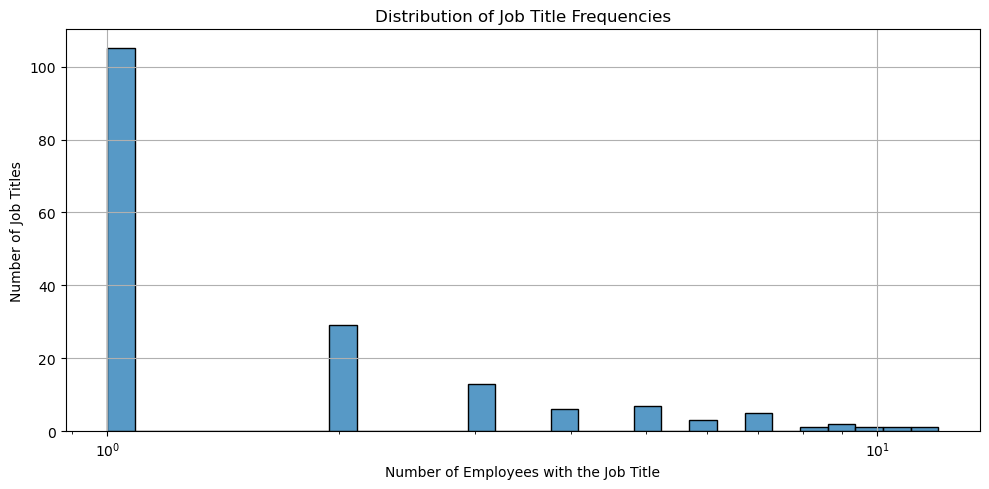

In [103]:
# rare job title
job_counts = data['Job Title'].value_counts()

# Plot distribution of job frequency (log scale for skewed data)
plt.figure(figsize=(10, 5))
sns.histplot(job_counts, bins=30, log_scale=(True, False))
plt.title("Distribution of Job Title Frequencies")
plt.xlabel("Number of Employees with the Job Title")
plt.ylabel("Number of Job Titles")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13916\3716302353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


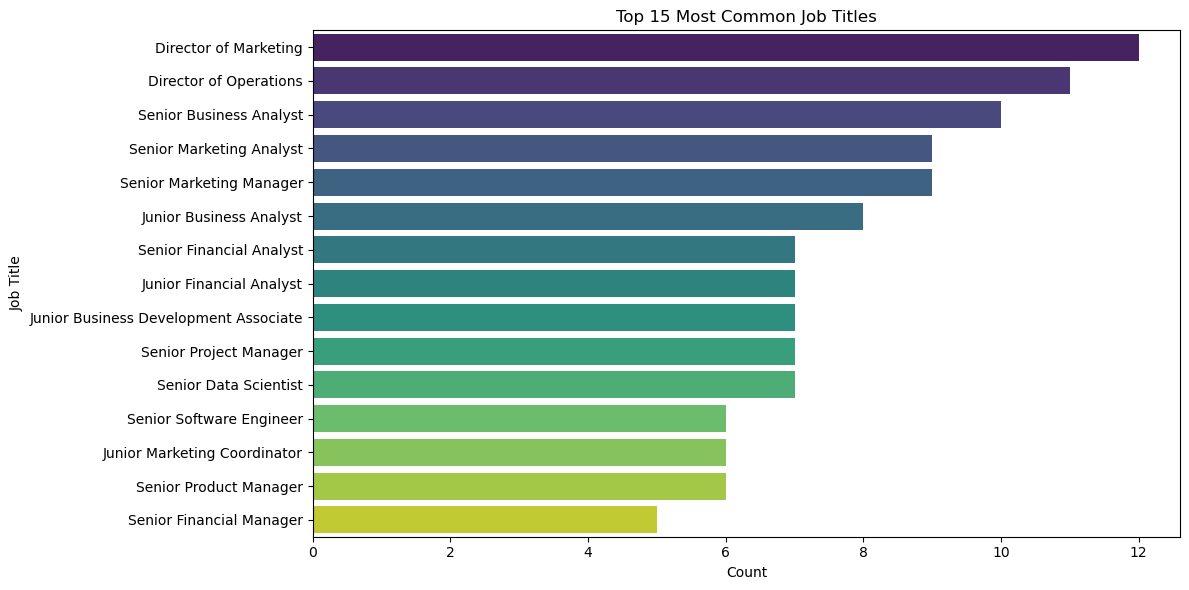

In [105]:
# most common job title
top_jobs = data['Job Title'].value_counts().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 15 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


In [106]:
import numpy as np

# Count frequencies
job_counts = data['Job Title'].value_counts()

# Group infrequent job titles as 'Other', safely handle NaNs
data['Job Title Grouped'] = data['Job Title'].apply(
    lambda x: x if pd.notnull(x) and job_counts.get(x, 0) > 2 else 'Other'
)



In [109]:
data.head()

,Age,Gender,Education Level,Job Title,Experience,Salary,Education Level Encoded,Job Title Grouped
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,Other
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,Other
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2,Other
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,Other
4,52.0,Male,Master's,Director,20.0,200000.0,1,Other


In [111]:
data['Job Title Grouped'].value_counts()

Job Title Grouped
Other                                    165
Director of Marketing                     12
Director of Operations                    11
Senior Business Analyst                   10
Senior Marketing Manager                   9
Senior Marketing Analyst                   9
Junior Business Analyst                    8
Junior Business Development Associate      7
Senior Data Scientist                      7
Junior Financial Analyst                   7
Senior Financial Analyst                   7
Senior Project Manager                     7
Junior Marketing Coordinator               6
Senior Software Engineer                   6
Senior Product Manager                     6
Senior Operations Manager                  5
Junior Operations Analyst                  5
Junior Marketing Specialist                5
Junior Project Manager                     5
Senior Project Coordinator                 5
Senior Product Designer                    5
Senior Financial Manager             

In [113]:
job_freq = data['Job Title'].value_counts().reset_index()
job_freq.columns = ['Job Title', 'Count']
print(job_freq)


                           Job Title  Count
0              Director of Marketing     12
1             Director of Operations     11
2            Senior Business Analyst     10
3           Senior Marketing Analyst      9
4           Senior Marketing Manager      9
..                               ...    ...
169     Business Development Manager      1
170  Customer Service Representative      1
171                       IT Manager      1
172        Digital Marketing Manager      1
173             Junior Web Developer      1

[174 rows x 2 columns]


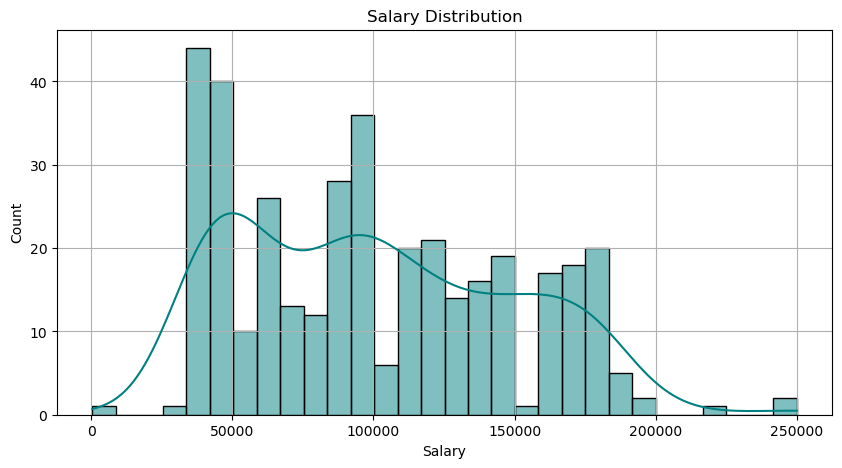

In [115]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Salary'], bins=30, kde=True, color='teal')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.grid(True)
plt.show()


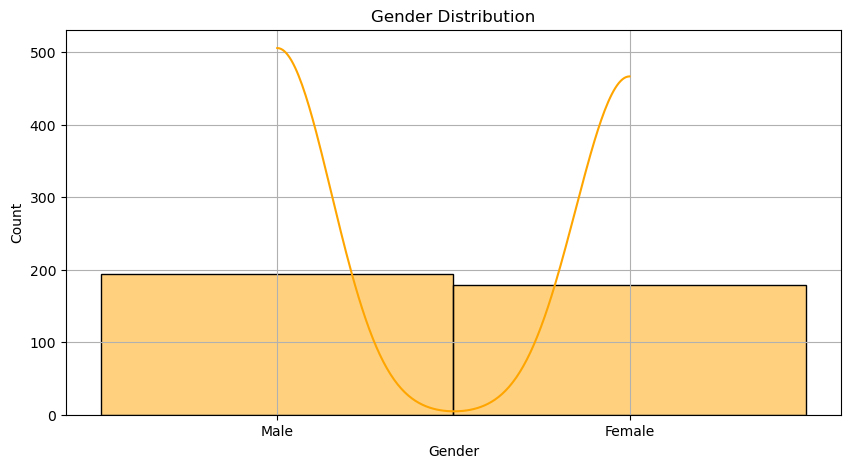

In [117]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Gender'], bins=30, kde=True, color='orange')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()


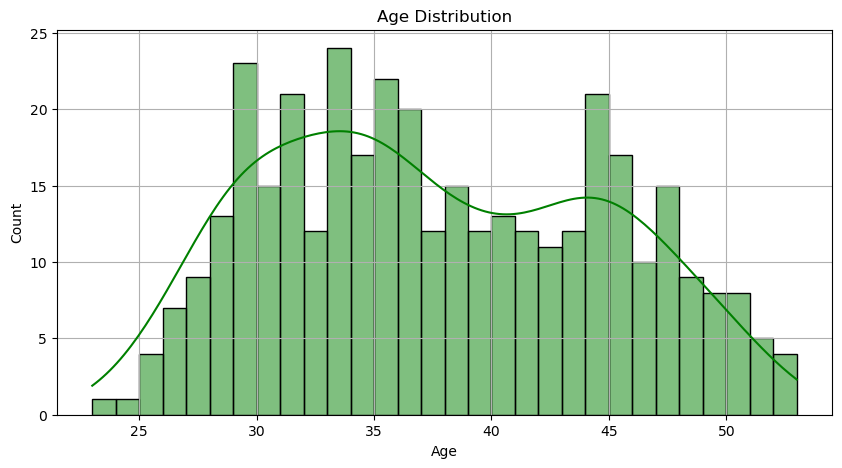

In [118]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True, color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

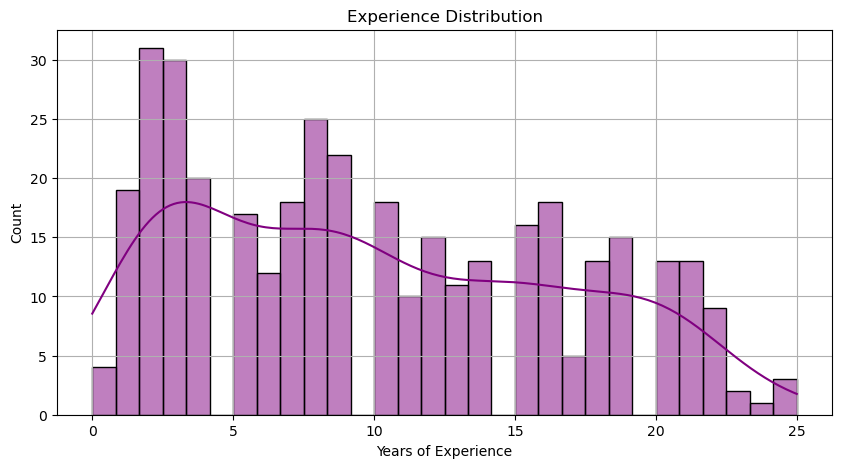

In [120]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Experience'], bins=30, kde=True, color='purple')
plt.title("Experience Distribution")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.grid(True)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13916\1988045210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set2')


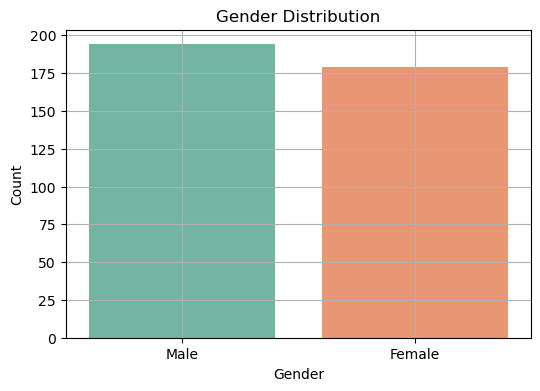

In [123]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()


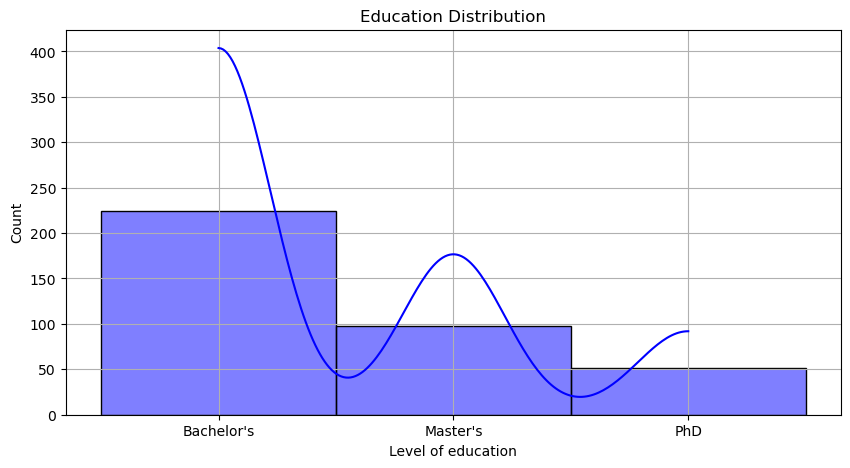

In [125]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Education Level'], bins=30, kde=True, color='blue')
plt.title("Education Distribution")
plt.xlabel("Level of education")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [127]:
#correaltion between salary and experince
correlation = data[['Salary', 'Experience']].corr()
print(correlation)


              Salary  Experience
Salary      1.000000    0.930338
Experience  0.930338    1.000000


In [129]:
#correaltion between salary and education
correlation = data[['Salary', 'Education Level Encoded']].corr()
print(correlation)


                           Salary  Education Level Encoded
Salary                   1.000000                 0.670371
Education Level Encoded  0.670371                 1.000000


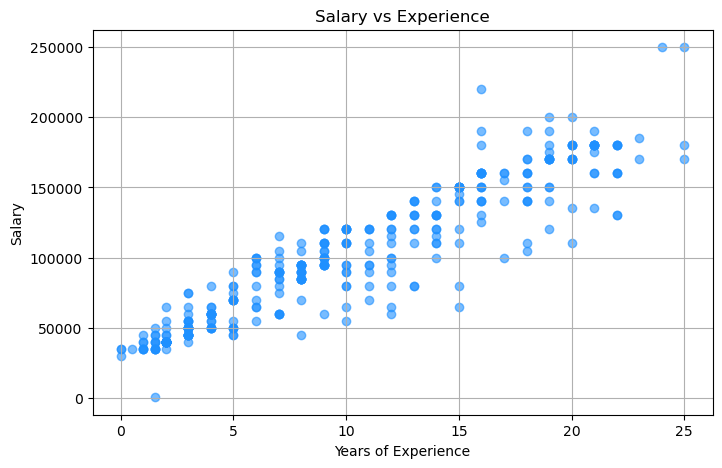

In [131]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Experience'], data['Salary'], color='dodgerblue', alpha=0.6)
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


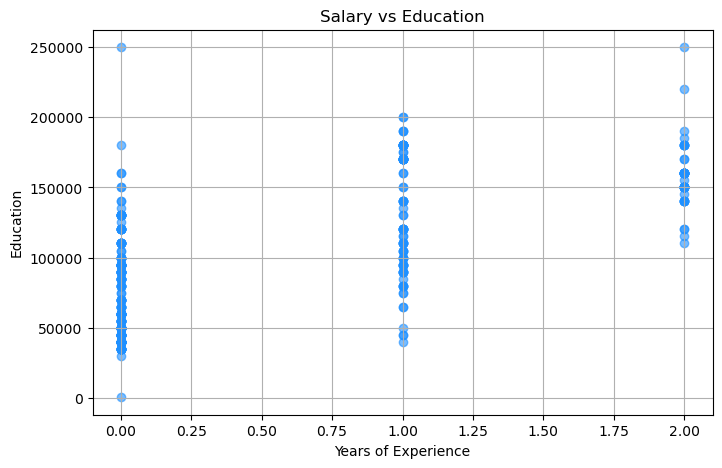

In [133]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Education Level Encoded'], data['Salary'], color='dodgerblue', alpha=0.6)
plt.title("Salary vs Education")
plt.xlabel("Years of Experience")
plt.ylabel("Education")
plt.grid(True)
plt.show()

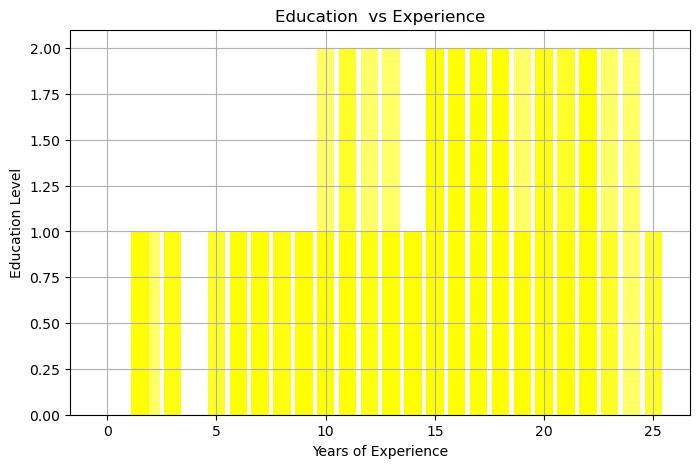

In [135]:
plt.figure(figsize=(8, 5))
plt.bar(data['Experience'], data['Education Level Encoded'], color='yellow', alpha=0.6)
plt.title("Education  vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Education Level")
plt.grid(True)
plt.show()

In [139]:
df.head()

,Age,Gender,Education Level,Job Title,Experience,Salary,Education Level Encoded,Job Title Grouped
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,Other
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,Other
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2,Other
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,Other
4,52.0,Male,Master's,Director,20.0,200000.0,1,Other


C:\Users\DELL\AppData\Local\Temp\ipykernel_13916\2162844246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=job_counts.index, x=job_counts.values, palette="Reds")


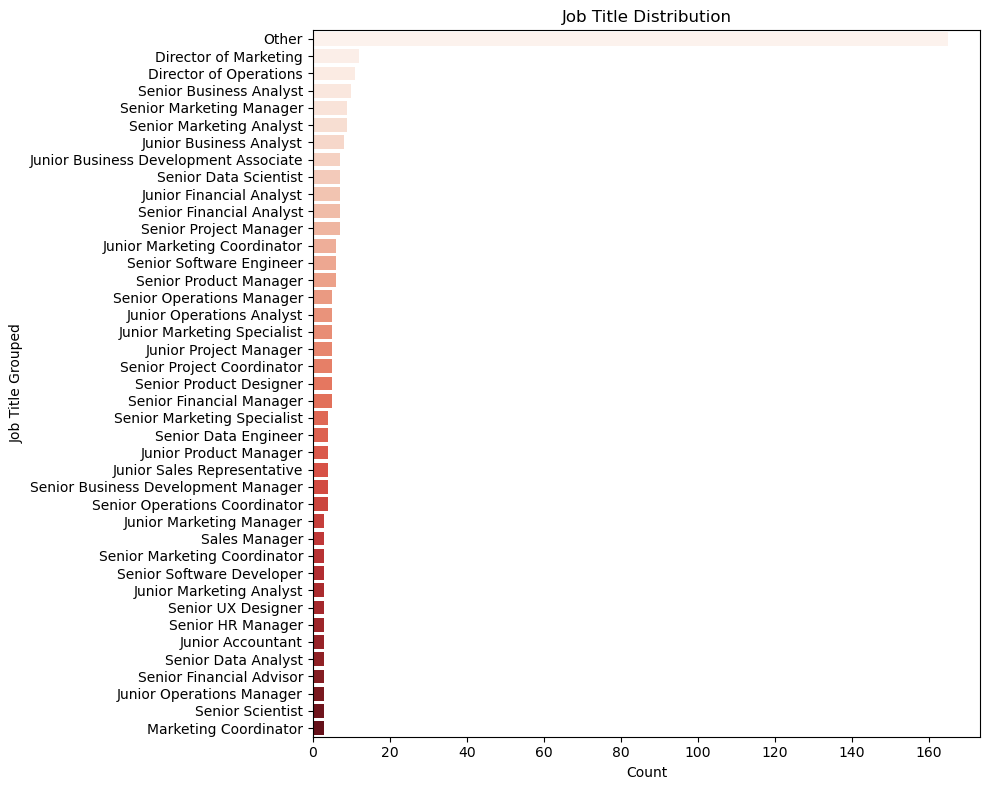

In [268]:
plt.figure(figsize=(10,8))
job_counts = data['Job Title Grouped'].value_counts()
sns.barplot(y=job_counts.index, x=job_counts.values, palette="Reds")
plt.xlabel("Count")
plt.ylabel("Job Title Grouped")
plt.title("Job Title Distribution")
plt.tight_layout()
plt.show()


In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Get unique job titles
job_titles = data['Job Title Grouped'].astype(str)

# Vectorize text
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X_tfidf = vectorizer.fit_transform(job_titles)

# Cluster
n_clusters = 8  # You can try different values
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_tfidf)

# Add cluster label to original data
data['Job Cluster'] = clusters


In [201]:
data['Job Cluster']

0      1
1      1
2      1
3      1
4      1
      ..
370    1
371    1
372    2
373    1
374    0
Name: Job Cluster, Length: 375, dtype: int32

In [203]:
# Replace 'Male' with 1 and 'Female' with 0
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})


In [205]:
data.head()

,Age,Gender,Education Level,Job Title,Experience,Salary,Education Level Encoded,Job Title Grouped,Job Cluster
0,32.0,1.0,Bachelor's,Software Engineer,5.0,90000.0,0,Other,1
1,28.0,0.0,Master's,Data Analyst,3.0,65000.0,1,Other,1
2,45.0,1.0,PhD,Senior Manager,15.0,150000.0,2,Other,1
3,36.0,0.0,Bachelor's,Sales Associate,7.0,60000.0,0,Other,1
4,52.0,1.0,Master's,Director,20.0,200000.0,1,Other,1


In [207]:
# See which job titles fall into which cluster
clustered_jobs = pd.DataFrame({'Job Title': job_titles, 'Cluster': clusters})
print(clustered_jobs.groupby('Cluster')['Job Title'].unique())


Cluster
0    [Senior Business Analyst, Junior Business Anal...
1    [Other, Sales Manager, Senior Scientist, Direc...
2    [Senior Project Manager, Senior Project Coordi...
3                              [Director of Marketing]
4    [Marketing Coordinator, Senior Marketing Coord...
5                           [Senior Software Engineer]
6    [Junior Marketing Specialist, Senior Marketing...
7    [Senior Financial Analyst, Junior Financial An...
Name: Job Title, dtype: object


In [209]:
data

,Age,Gender,Education Level,Job Title,Experience,Salary,Education Level Encoded,Job Title Grouped,Job Cluster
0,32.0,1.0,Bachelor's,Software Engineer,5.0,90000.0,0,Other,1
1,28.0,0.0,Master's,Data Analyst,3.0,65000.0,1,Other,1
2,45.0,1.0,PhD,Senior Manager,15.0,150000.0,2,Other,1
3,36.0,0.0,Bachelor's,Sales Associate,7.0,60000.0,0,Other,1
4,52.0,1.0,Master's,Director,20.0,200000.0,1,Other,1
...,...,...,...,...,...,...,...,...,...
370,35.0,0.0,Bachelor's,Senior Marketing Analyst,8.0,85000.0,0,Senior Marketing Analyst,1
371,43.0,1.0,Master's,Director of Operations,19.0,170000.0,1,Director of Operations,1
372,29.0,0.0,Bachelor's,Junior Project Manager,2.0,40000.0,0,Junior Project Manager,2
373,34.0,1.0,Bachelor's,Senior Operations Coordinator,7.0,90000.0,0,Senior Operations Coordinator,1


In [243]:
X_clean = X.dropna()
y_clean = y[X_clean.index]


In [245]:
from sklearn.model_selection import train_test_split
features = [ "Job Cluster", "Education Level Encoded", "Experience", "Age" ,"Gender"]
X = data[features]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
print("Missing values in y:", y.isnull().sum())

Missing values in y: 2


In [251]:
# Combine X and y for a clean drop
df_clean = pd.concat([X, y], axis=1)

# Drop rows with NaN in target column
df_clean = df_clean.dropna(subset=['Salary'])  # replace 'Salary' if your target column is named differently

# Split back
X = df_clean.drop(columns=['Salary'])
y = df_clean['Salary']


In [262]:
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())


In [264]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Your features and target
X = data.drop(columns=['Salary', 'Job Title', 'Job Title Grouped'])  # replace 'Salary' with your actual target
y = data['Salary']

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Imputers
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')
# Preprocessor
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', numeric_imputer),
        ('scaler', StandardScaler())
    ]), numeric_cols),
    
    ('cat', Pipeline([
        ('imputer', categorical_imputer),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

# Final pipeline with model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
pipeline.fit(X_train, y_train)
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pipeline.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))




R² Score: 0.9017846746119358
RMSE: 15424.861959436379


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
